In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# seed fixing
SEED = 42

In [3]:
df = pd.read_csv('asteroid_data.csv', parse_dates=['Close Approach Date', 'Orbit Determination Date', 'Epoch Date Close Approach'])
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [4]:
df.dtypes

Neo Reference ID                         int64
Name                                     int64
Absolute Magnitude                     float64
Est Dia in KM(min)                     float64
Est Dia in KM(max)                     float64
Est Dia in M(min)                      float64
Est Dia in M(max)                      float64
Est Dia in Miles(min)                  float64
Est Dia in Miles(max)                  float64
Est Dia in Feet(min)                   float64
Est Dia in Feet(max)                   float64
Close Approach Date             datetime64[ns]
Epoch Date Close Approach               object
Relative Velocity km per sec           float64
Relative Velocity km per hr            float64
Miles per hour                         float64
Miss Dist.(Astronomical)               float64
Miss Dist.(lunar)                      float64
Miss Dist.(kilometers)                 float64
Miss Dist.(miles)                      float64
Orbiting Body                           object
Orbit ID     

## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Neo Reference ID              4687 non-null   int64         
 1   Name                          4687 non-null   int64         
 2   Absolute Magnitude            4687 non-null   float64       
 3   Est Dia in KM(min)            4687 non-null   float64       
 4   Est Dia in KM(max)            4687 non-null   float64       
 5   Est Dia in M(min)             4687 non-null   float64       
 6   Est Dia in M(max)             4687 non-null   float64       
 7   Est Dia in Miles(min)         4687 non-null   float64       
 8   Est Dia in Miles(max)         4687 non-null   float64       
 9   Est Dia in Feet(min)          4687 non-null   float64       
 10  Est Dia in Feet(max)          4687 non-null   float64       
 11  Close Approach Date           

In [6]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627


## Checking null values

<Axes: >

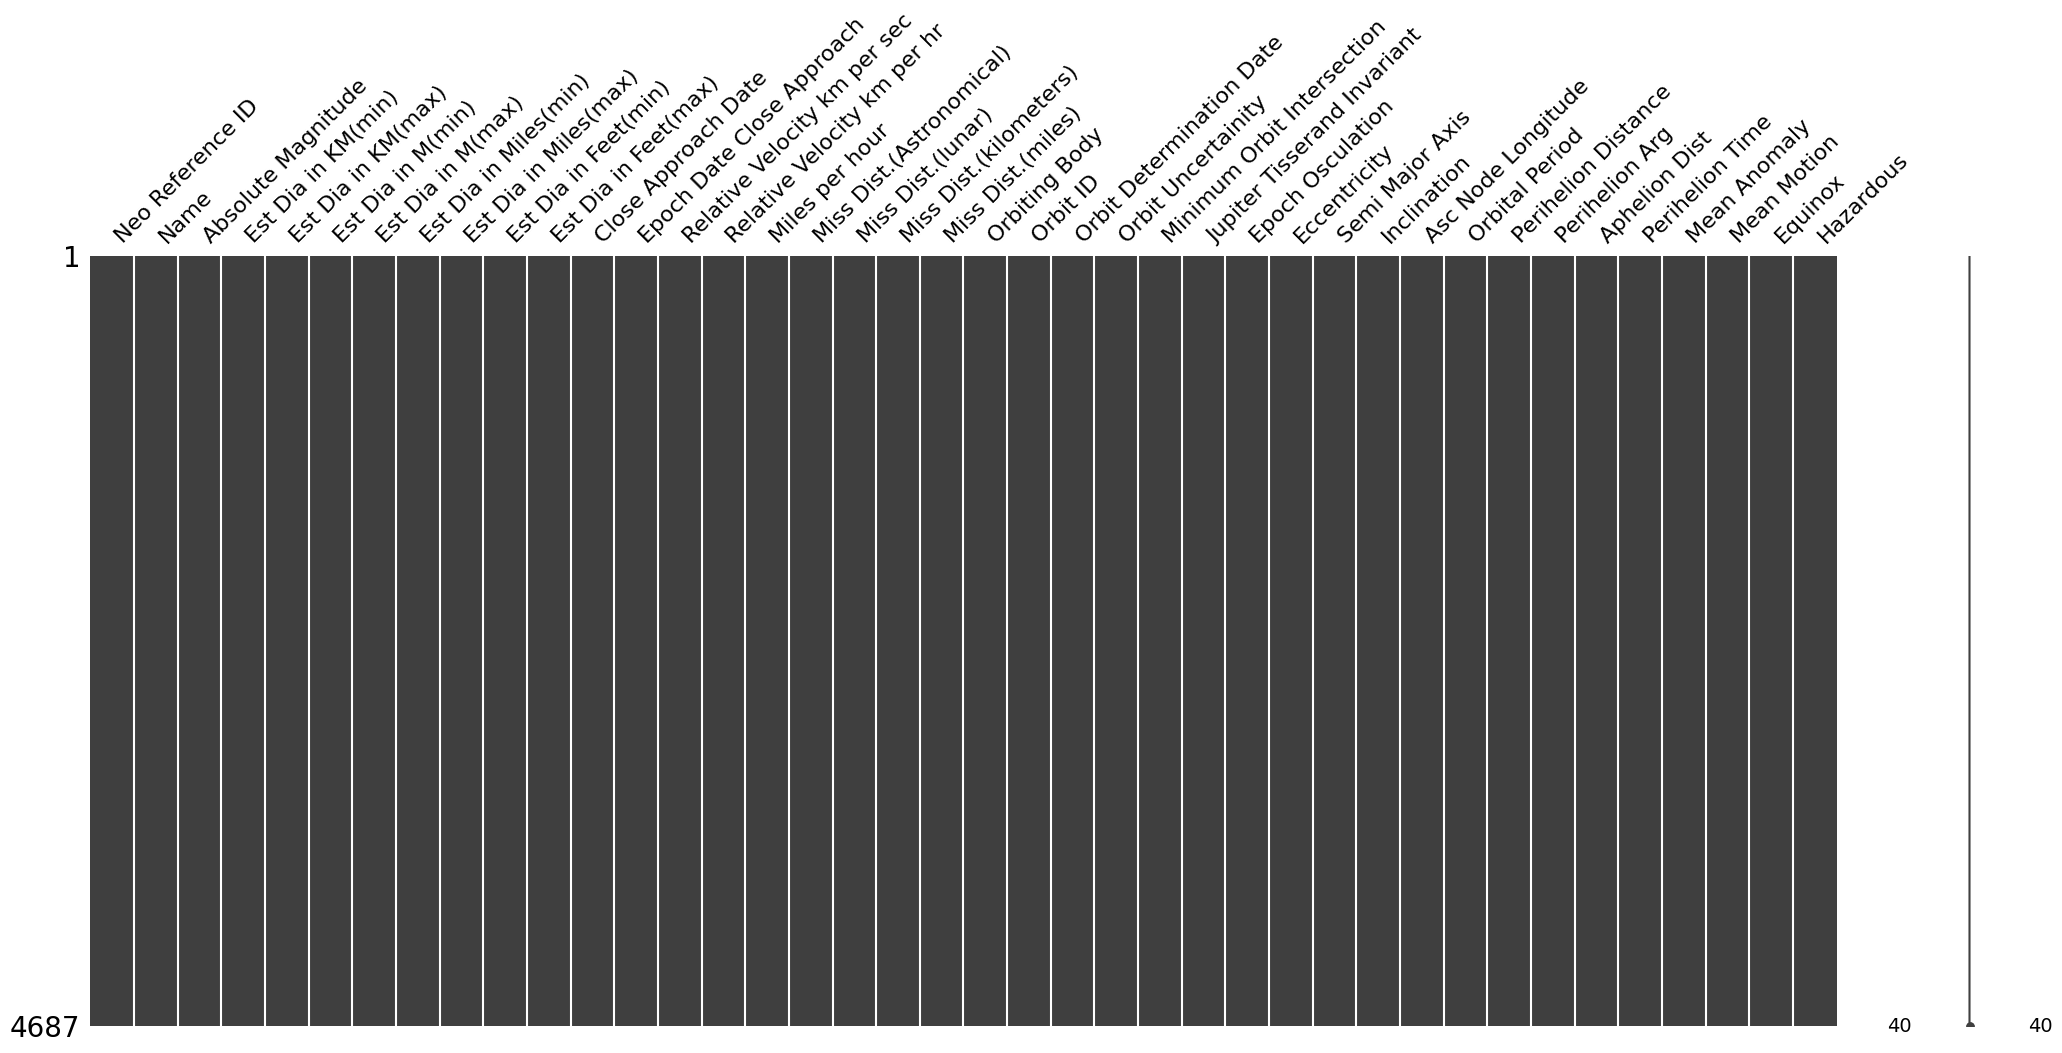

In [8]:
import missingno as msno

msno.matrix(df)

In [7]:
## Dimensionality reduction

## Categorical Feature Encoding

In [11]:
encoder = LabelEncoder()

df['hazardous'] = encoder.fit_transform(df.Hazardous)

# Dropping these categorical features since they are repeated among all observations
df = df.drop(['Orbiting Body', 'Equinox', 'Hazardous'], axis = 1)

## Train-test split

In [12]:
features = df.drop('hazardous', axis = 1).values
target = df['hazardous'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.7, stratify = target, random_state = SEED)

In [13]:
# Creating the Features/Label split as numpy arrays
features = df.drop('hazardous', axis=1).values
label = df.hazardous.values

# Creating the test/train split
training_features, test_features, training_label, test_label = train_test_split(features, label,
                                                                                test_size=0.8,
                                                                                stratify=label,
                                                                                random_state=SEED)

df_graph = df.copy()
feature_names = df_graph.drop('hazardous', axis=1).columns.tolist()

In [14]:
feature_names

['Absolute Magnitude',
 'Est Dia in KM(min)',
 'Relative Velocity km per sec',
 'Miss Dist.(kilometers)',
 'Orbit ID',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant',
 'Epoch Osculation',
 'Eccentricity',
 'Inclination',
 'Asc Node Longitude',
 'Orbital Period',
 'Perihelion Distance',
 'Perihelion Arg',
 'Aphelion Dist',
 'Perihelion Time',
 'Mean Anomaly',
 'Mean Motion']

## Models

## Decision Tree

In [15]:
hyperparameters_decision_tree = {'max_depth'        : np.arange(0, 25, 1),
                                 'criterion'        : ['gini', 'entropy'],
                                 'min_samples_leaf' : np.arange(0, 1, 0.05),
                                  'random_state'    : [SEED]}

# Applying GridSearchCV
decision_tree_grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                                  param_grid = hyperparameters_decision_tree,
                                  scoring = 'accuracy',
                                  cv = 10)

decision_tree_grid.fit(X_train, y_train)
decision_tree_opt = decision_tree_grid.best_params_

decision_tree_score = (decision_tree_grid.best_score_*100).round(2)
decision_tree_est = decision_tree_grid.best_estimator_
decision_tree_features = decision_tree_est.feature_importances_

# Score on holdout data
decision_tree_holdout_score = (decision_tree_grid.score(test_features, test_label)*100).round(2)

print('Optimal Hyperparameters:')
print(decision_tree_opt)
print('Optimal Estimator:')
print(decision_tree_est)

print('Training Accuracy {}'.format(decision_tree_score))
print('Testing Accuracy {}'.format(decision_tree_holdout_score))

Optimal Hyperparameters:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 0.05, 'random_state': 42}
Optimal Estimator:
DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.05, random_state=42)
Training Accuracy 99.36
Testing Accuracy 99.55


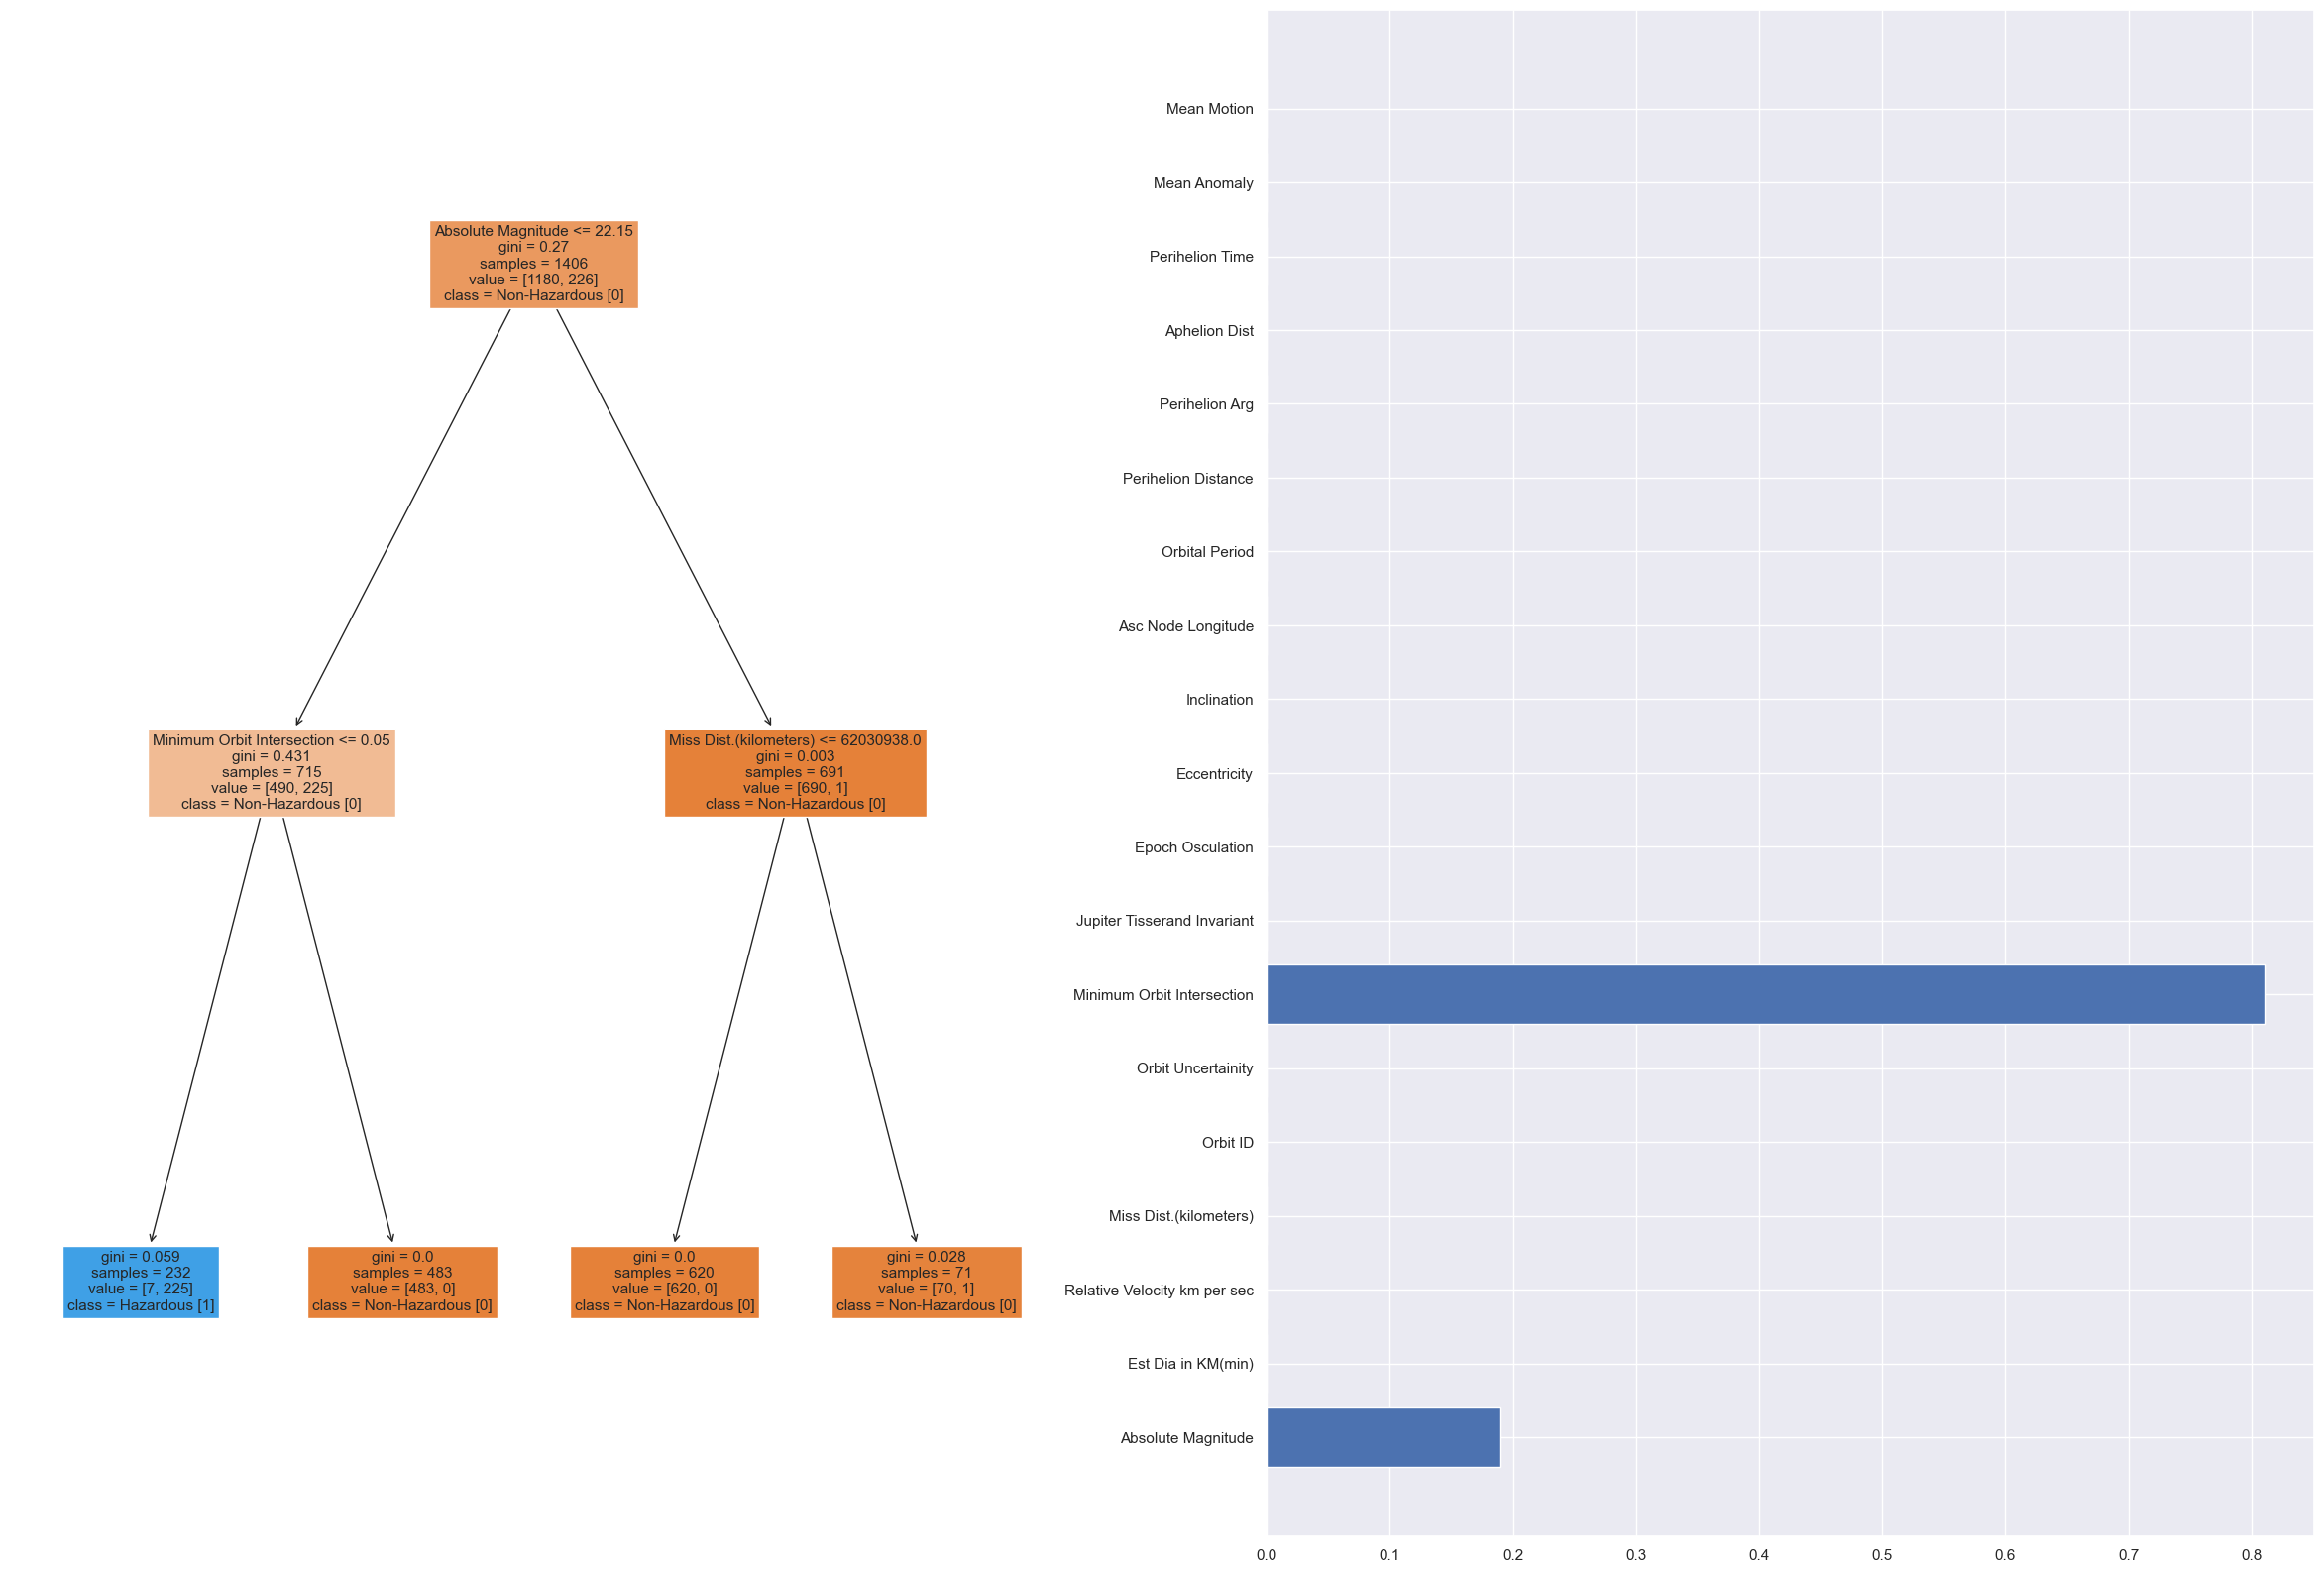

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [16]:
# Plotting the optimal tree
plt.subplot(1, 2, 1)
plot_tree(decision_tree_est,
          feature_names = feature_names,  
          class_names = ['Non-Hazardous [0]', 'Hazardous [1]'],
          filled = True)

# Plotting feature importnace
plt.subplot(1, 2, 2)
plt.barh(feature_names, decision_tree_features)

plt.show()
plt.close

## Random Forest

In [17]:
rf_params = {'max_depth': np.arange(0, 30, 1),
             'criterion': ['gini', 'entropy'],
             'min_samples_leaf': np.arange(0, 1, 0.05),
             'random_state': [SEED],
             'n_estimators': np.arange(0, 20, 1)}


rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_params,
                       scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train)
rf_opt_param = rf_grid.best_params_
rf_best_score = (rf_grid.best_score_*100).round(2)
rf_best_est = rf_grid.best_estimator_
rf_feat_imp = rf_best_est.feature_importances_

rf_holdout_score = (rf_grid.score(X_test, y_test)*100).round(2)

print('Optimal Hyperparameters:')
print(rf_opt_param)
print('Optimal Estimator:')
print(rf_best_est)
print('Training Accuracy {}'.format(rf_best_score))
print('Testing Accuracy {}'.format(rf_holdout_score))

KeyboardInterrupt: 

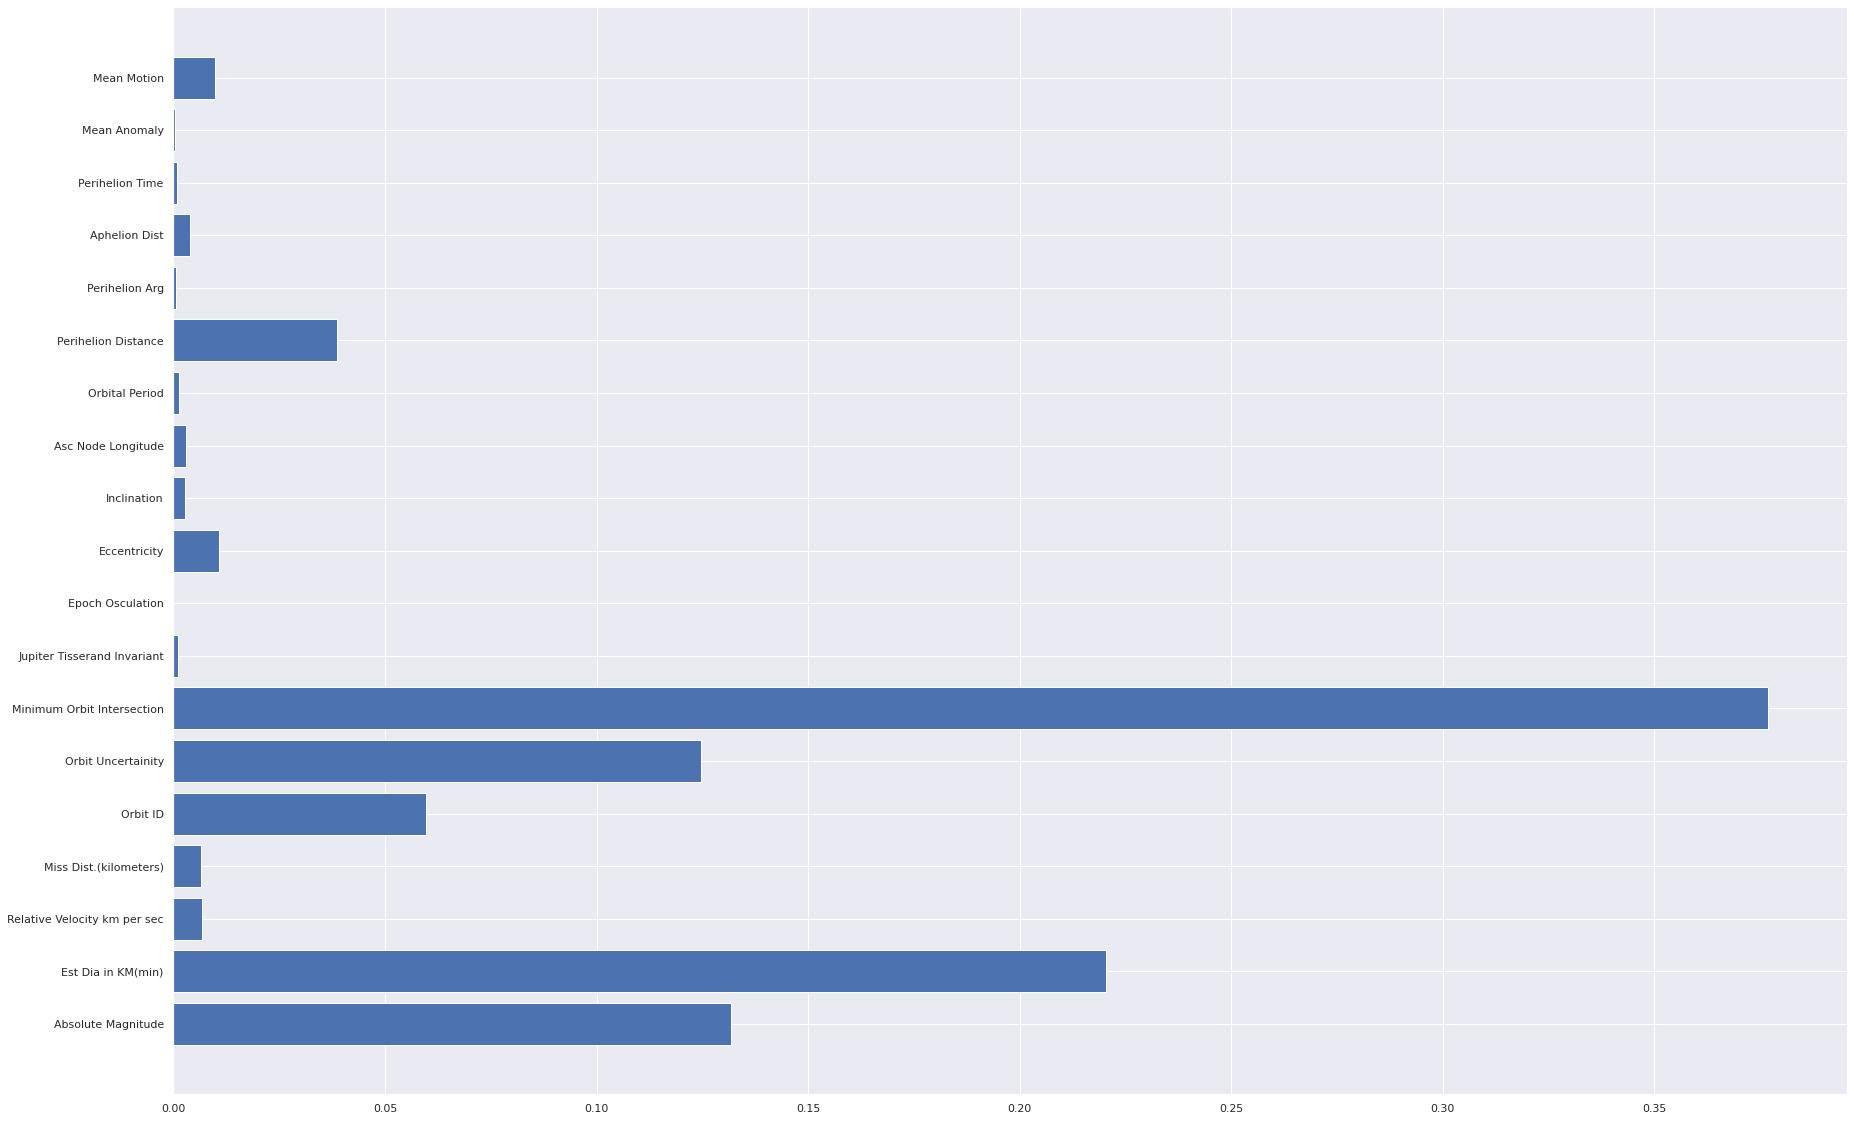

<function matplotlib.pyplot.close(fig=None)>

In [ ]:
# Plotting feature importance
plt.barh(feature_names, rf_feat_imp)
plt.show()
plt.close

## Support Vector Machines

In [18]:
svm_pipe = Pipeline([('Scaling', StandardScaler()),
                     ('SVM', SVC())])

svm_params = {'SVM__C': np.arange(0, 20, 0.1),
              'SVM__gamma': [0.01, 0.1, 1, 2, 5],        
              'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'SVM__random_state': [SEED]}

svm_grid = GridSearchCV(estimator=svm_pipe, param_grid=svm_params,
                        scoring='accuracy', cv=5)
svm_grid.fit(X_train, y_train)
svm_opt_param = svm_grid.best_params_
svm_best_score = (svm_grid.best_score_*100).round(2)
svm_best_est = svm_grid.best_estimator_

svm_holdout_score = (svm_grid.score(X_test, y_test)*100).round(2)

print('Optimal Hyperparameters:')
print(svm_opt_param)
print('Optimal Estimator:')
print(svm_best_est)

print('Training Accuracy {}'.format(svm_best_score))
print('Testing Accuracy {}'.format(svm_holdout_score))

Optimal Hyperparameters:
{'SVM__C': 15.600000000000001, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf', 'SVM__random_state': 42}
Optimal Estimator:
Pipeline(steps=[('Scaling', StandardScaler()),
                ('SVM',
                 SVC(C=15.600000000000001, gamma=0.01, random_state=42))])
Training Accuracy 96.09
Testing Accuracy 94.39


## XGBoosting

In [19]:
# Creating hyperparameter options
xgb_params = {'max_depth': np.arange(0, 5, 1),
              'objective': ['binary:logistic'],
              'random_state': [SEED],
              'alpha': [0, 0.01, 0.1, 1],
              'lambda': [0, 0.01, 0.1, 1],
              'subsample': [0.25, 0.5, 0.75],
              'colsample_bytree': [0.25, 0.5, 0.75],
              'eval_metric': ['logloss']}

# GridSearcCV
xgb_grid = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_params,
                            scoring='accuracy', cv=5)
xgb_grid.fit(X_train, y_train)
xgb_opt_param = xgb_grid.best_params_
xgb_best_score = (xgb_grid.best_score_*100).round(2)
xgb_best_est = xgb_grid.best_estimator_
xgb_feat_imp = xgb_best_est.feature_importances_

# Score on holdout data
xgb_holdout_score = (xgb_grid.score(X_test, y_test)*100).round(2)

print('Optimal Hyperparameters:')
print(xgb_opt_param)
print('Optimal Estimator:')
print(xgb_best_est)
print('\n')
print('Training Accuracy {}'.format(xgb_best_score))
print('Testing Accuracy {}'.format(xgb_holdout_score))

Optimal Hyperparameters:
{'alpha': 0, 'colsample_bytree': 0.75, 'eval_metric': 'logloss', 'lambda': 1, 'max_depth': 1, 'objective': 'binary:logistic', 'random_state': 42, 'subsample': 0.75}
Optimal Estimator:
XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', lambda=1, learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.75, tree_method='exact',
              validate_parameters=1, verbosity=None)


Training Accuracy 99.57
Testing Accuracy 99.57


<BarContainer object of 19 artists>

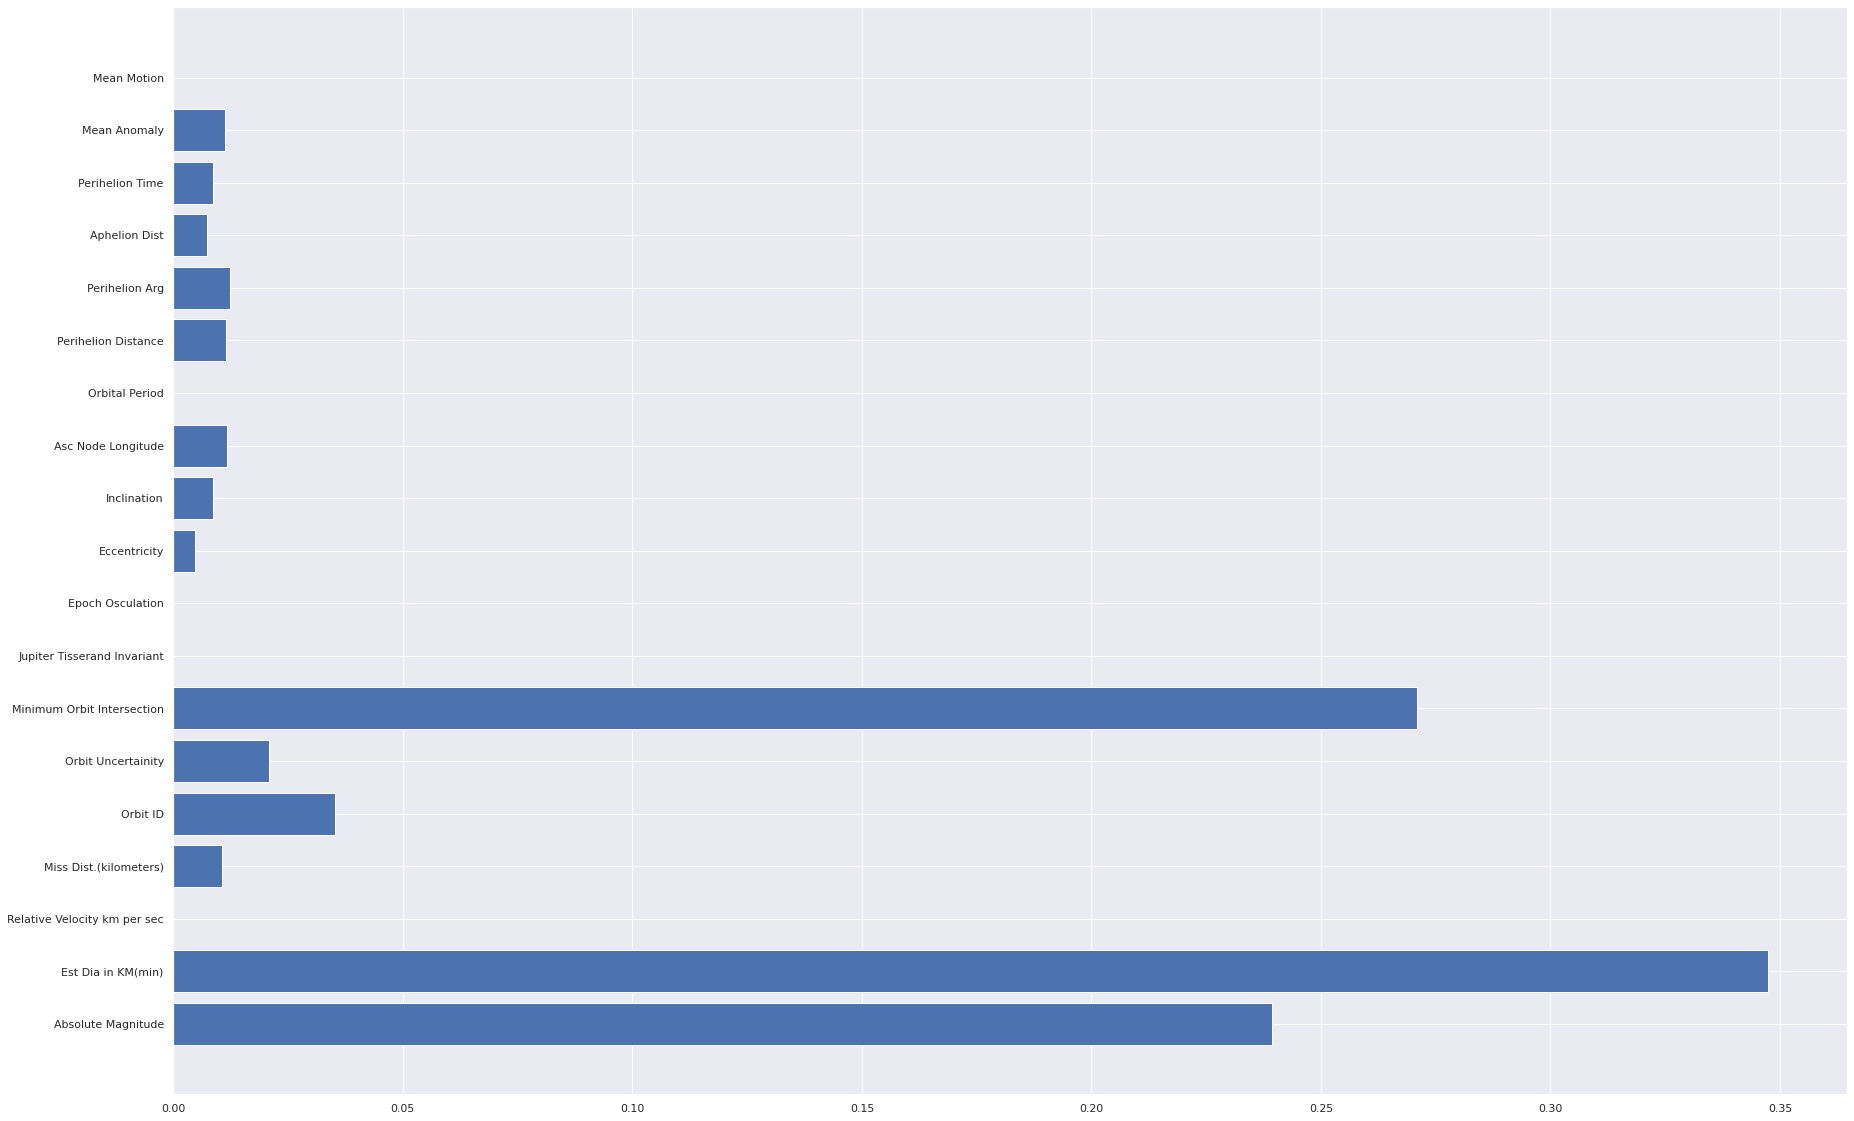

In [20]:
# Plotting feature importance
plt.barh(feature_names, xgb_feat_imp)

## KMeans and PCA - Approach to identifying asteroids groups

In [21]:
scaler = StandardScaler()
df = df.drop(['hazardous', 'Orbit ID'], axis = 1)
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.23104209, -0.20941058, -1.07713904, ...,  0.45919023,
         0.77839321, -0.43110028],
       [-0.33482448, -0.15840557,  0.56814611, ...,  0.07081791,
        -0.06909298,  0.31258164],
       [-0.68076581,  0.07278876, -0.8748918 , ...,  0.41557933,
         1.03940428, -0.52211437],
       ...,
       [ 0.14949337, -0.34623784, -0.92961547, ...,  0.60624482,
         0.20776991, -0.63207867],
       [-0.16185382, -0.23970271, -0.35910064, ...,  0.5933032 ,
         0.2079915 , -0.56766111],
       [-1.09278193,  0.53049632,  3.01353552, ...,  0.62542342,
         0.03397983, -0.54733945]])

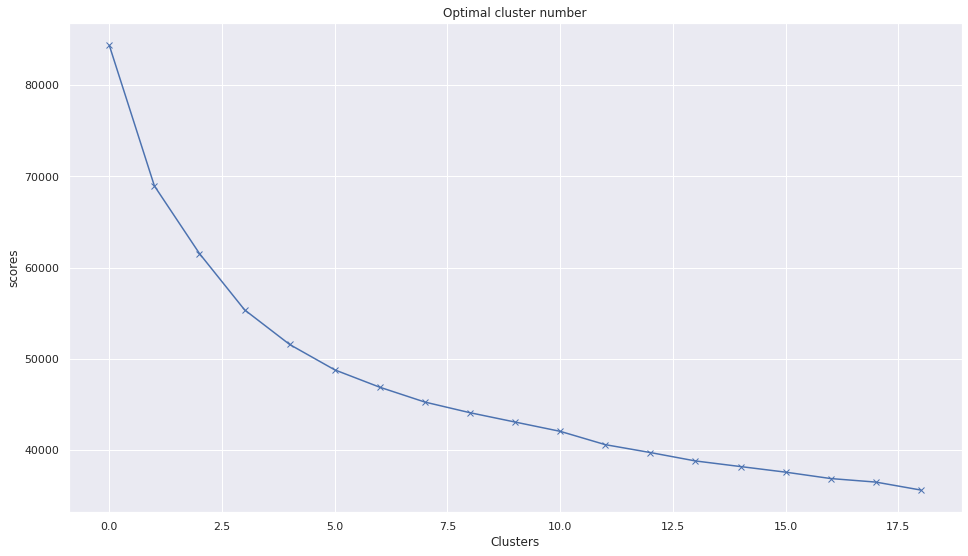

In [22]:
from sklearn.cluster import KMeans

scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

plt.figure(figsize=(16,9)) 
plt.plot(scores_1, 'bx-')
plt.title('Optimal cluster number')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [23]:
kmeans = KMeans(4)
kmeans.fit(df_scaled)
labels = kmeans.labels_

kmeans.cluster_centers_.shape

(4, 18)

In [24]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,23.623634,0.107812,13.469581,2.195932e+07,7.359155,0.055621,4.733630,2.454535e+06,0.418867,13.025778,168.054385,705.941070,0.829589,181.387676,2.193311,2.454524e+06,166.395829,0.650795
1,20.835860,0.301136,14.788071,3.859356e+07,2.936483,0.131242,3.589368,2.457926e+06,0.527617,13.476908,173.068474,1107.826123,0.952231,175.911874,3.200257,2.457934e+06,183.436225,0.351604
2,20.249956,0.338081,18.281838,4.934255e+07,1.287002,0.100483,5.778206,2.457920e+06,0.409351,19.813009,165.734080,413.824080,0.635595,189.327382,1.516603,2.457928e+06,188.804606,0.952453
3,24.597746,0.050314,10.236555,3.273905e+07,4.991578,0.037541,5.631093,2.457939e+06,0.251625,8.542438,176.951287,447.772348,0.843019,186.119548,1.426565,2.457941e+06,176.172130,0.872364


Simply, according to our KMeans approach, the asteroids can be subgrouped in 4 clusters.
- **Cluster 0**: higher magnitude, lowest `Est Dia in KM` and highest orbit uncertainty
- **Cluster 1**: mean magnitude, highest relative velocity (km/sec), highest Miss Dist (kilometers) and lowest orbit uncertainty, most inclinated and most `mean motion` value.
- **Cluster 2**: Highest eccentricity and greater orbital period
- **Cluster 3**: Highest magnitude and lowest relative velocity, smaller eccentricity and least inclination among other clusters.

In [25]:
from sklearn.decomposition import PCA

# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[ 0.10150746, -0.33419743],
       [-0.41445053,  1.67561527],
       [ 0.38424437, -0.4247911 ],
       ...,
       [ 0.29763236, -1.66419087],
       [ 0.59570286, -0.25573576],
       [ 1.47197551,  2.74638236]])

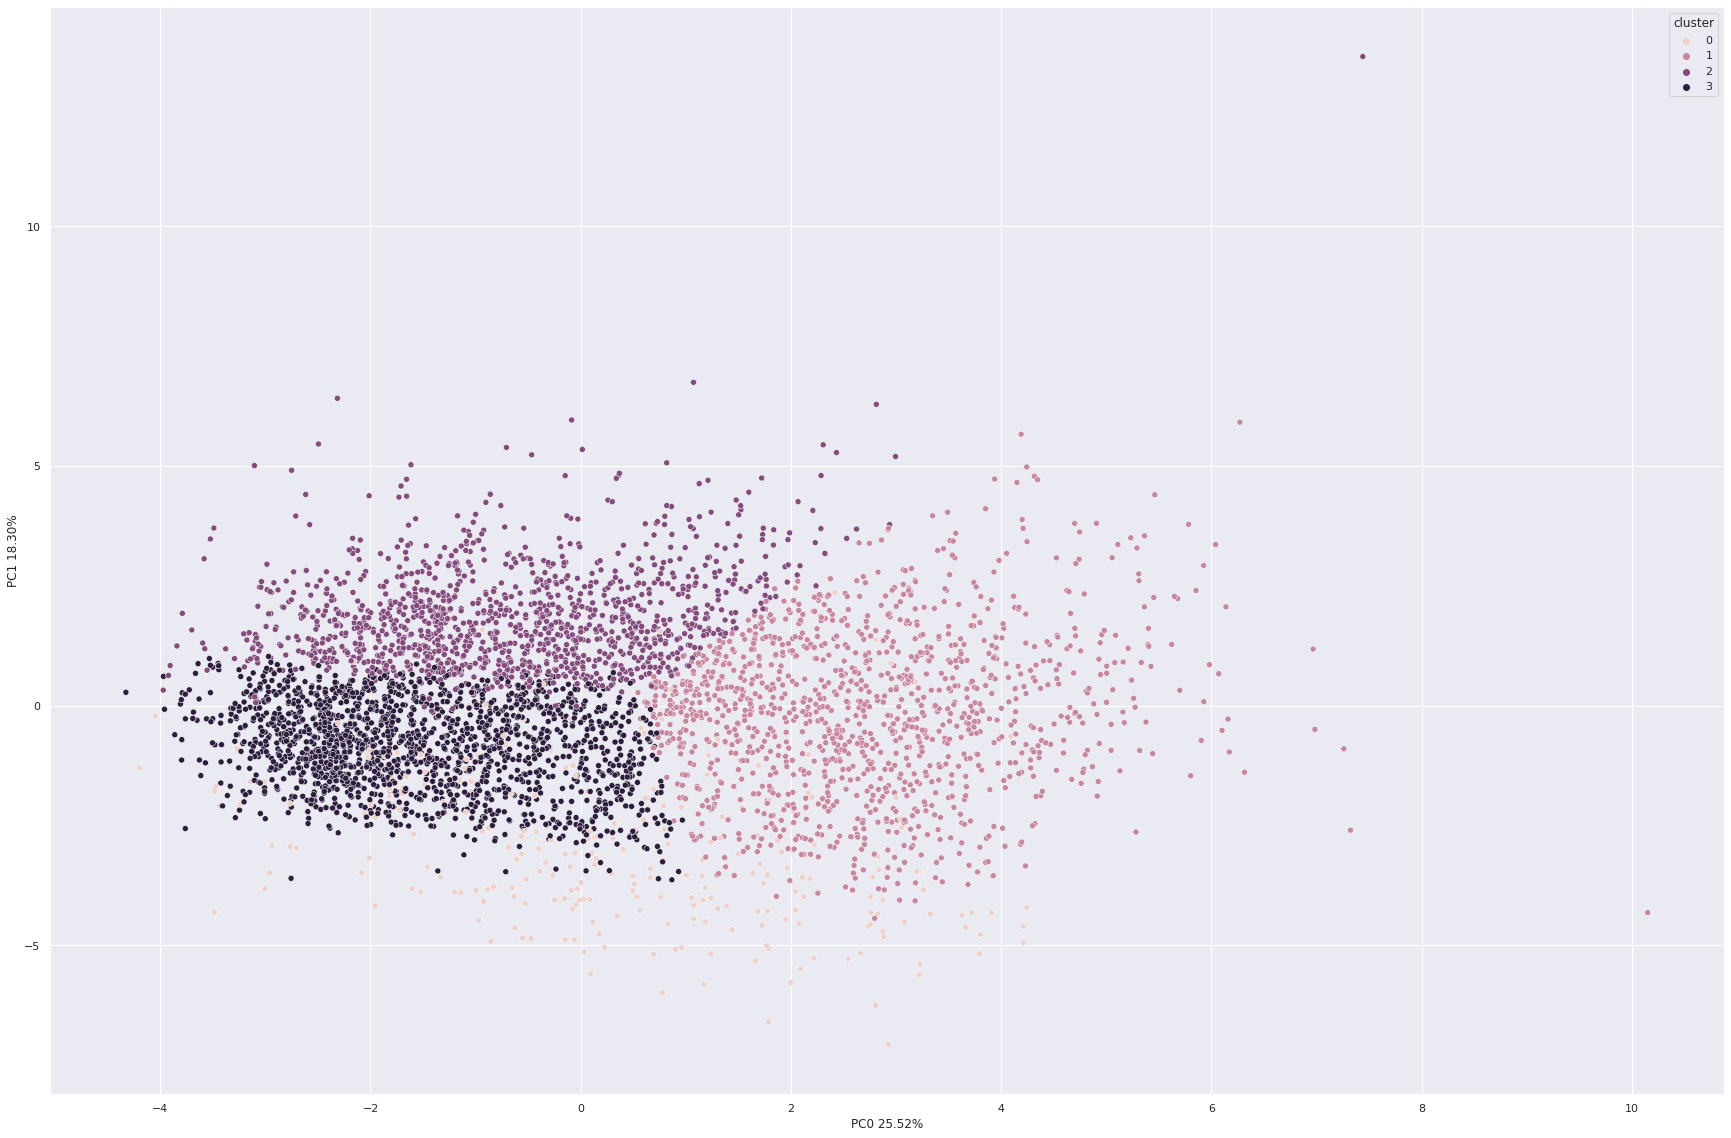

In [26]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()


ax = sns.scatterplot(x = pca_df['pca1'], y=pca_df['pca2'], hue = "cluster", data = pca_df)
ax.set(xlabel = f"PC0 {pca.explained_variance_ratio_[0]*100:.2f}%", ylabel=f"PC1 {pca.explained_variance_ratio_[1]*100:.2f}%")
plt.show()

## Conclusion
### Model Performance on Unseen Data

|Model |Accuracy  |
--- | --- 
|Decision Tree|99,55%|
|Random Forest|98,93%|
|Support Vector Machine|94,39%|
|XGBoosting|99,57%|


Clearly, using decision tree provided the best performance on unseen data, of course, considering its simplicity and fast execution, and thus is the best model for this classifcation problem out of those tested.

### Feature Importance
Looking into each tree based model we can see a pattern on feature importance of the best estimator found for each model:

- Minimum Orbit Intersection
- Absolute Magnitude
- Est Dia in Km